# **Darcys Experiment**

**Sebastian Gnann**


Bei Fragen und Feedback wenden Sie sich bitte an: sebastian.gnann@hydrologie.uni-freiburg.de

---

Diese Online-Übung basiert auf einem sogenannten Jupyter Notebook (https://jupyter.org/). 
Ein Notebook besteht aus einzelnen Zellen, die entweder Markdown-Text oder Python-Code beinhalten.

Bitte führen Sie das gesamte Notebook von Anfang an aus, damit alle Python-Module und die Daten in der richtigen Reihenfolge geladen werden.
Klicken Sie zunächst auf das Symbol "Restart the kernel". Dann können Sie jeden Abschnitt einzeln ausführen, indem Sie auf die entsprechende Zelle und dann auf das Symbol "Run the selected cell and advance" klicken (alternativ: Shift + Enter drücken). 
Sie können auch auf "Restart the kernel and run all cells" klicken, um das gesamte Notebook auszuführen. Dies sollte sicherstellen, dass alles in der richtigen Reihenfolge ausgeführt wird.

Nun können Sie sich Stück für Stück durch die Text- und Codezellen arbeiten. 

Sollten Sie länger inaktiv sein, kann es vorkommen, dass das Notebook nicht mehr richtig läuft (z.B. Nachricht "Kernel died unexpectedly"). Starten Sie in diesem Fall das Notebook einfach neu, am besten mit "Restart the kernel and run all cells". Sie können dann direkt zu dem Punkt zurückkehren, an dem Sie sich befanden, und müssen sich nicht erneut durch alle Zellen klicken. Sollte das Notebook gar nicht mehr laufen, dann laden Sie bitte den gesamten Link erneut.

Auf der linken Seite können Sie sich auch ein Inhaltsverzeichnis anzeigen lassen, indem Sie auf "Table of Contents" klicken. Das hilft beim Navigieren.

## Henry Darcy

Henry Darcy war ein französischer Ingenieur, der heutzutage vor allem für sein für die Hydrogeologie grundlegendes Gesetz bekannt ist. 
Dieses Jupyter-Notebook führt Sie durch sein Experiment and veranschaulicht anhand von Darcys Ergebnissen die Entdeckung von "Darcy's Gesetz".

<img src="figures/Henry_Darcy.png" alt="drawing" width=200/>

**Abb.1**: Porträt von Henry Darcy von F. Perrodin, aus der Sammlung der Bibliothéque Municipale von Dijon. Aus Brown (2002).


## Wasser für Dijon

Henry Darcy wurde 1832 beauftragt die Wasserversorgung der Stadt Dijon zu planen.
Um eine ausreichende Wasserqualität sicherzustellen, sollten Sandfilter verwendet werden. 
Im Zuge seiner Arbeit untersuche Darcy auch das Fließverhalten von Wasser durch sandgefüllte Säulen, wie es in Abb. 2 dargestellt ist.

<img src="figures/Darcys_Apparatus.png" alt="drawing" width=300/>

**Abb.2**: Säulenapparat (Darcy, 1856; Abbildung 3, Tafel 24). Aus Brown (2002).

## Quellen

Darcy, H. (1856). Les fontaines publiques de la ville de Dijon: exposition et application des principes à suivre et des formules à employer dans les questions de distribution d'eau (Vol. 1). Victor dalmont.
https://books.google.de/books?hl=en&lr=&id=yXKx1zPVQMUC&oi=fnd&pg=PA1&ots=UdPk-oEje5&sig=ksXQ76YnQa8TMkioUfaoD7dF89s&redir_esc=y#v=onepage&q&f=false

Freeze, R. A. (1994). Henry Darcy and the fountains of Dijon. Groundwater, 32(1), 23-30.
https://ngwa.onlinelibrary.wiley.com/doi/epdf/10.1111/j.1745-6584.1994.tb00606.x

Brown, G. O. (2002). Henry Darcy and the making of a law. Water Resources Research, 38(7), 11-1.
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2001WR000727



## Notwendige Python Packages
Es gibt verschieden sogenannte Packages für Python, die bestimme Funktionen ausführen. 
Manche Packages helfen beim Erstellen von Grafiken, andere erledigen bestimmte Rechenaufgaben (z.B. statistische Tests).
Diese müssen am Anfang importiert werden. Wird das nicht gemacht, kann der nachstehende Code nicht ausgeführt werden.

In [1]:
# import all necessary Python packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import ipywidgets as widgets

## Darcys Bericht

Die Ergebnisse aus Darcys Versuchen sind in seinem Bericht (1856) festgehalten. 
Diese können nun genutzt werden um Darcys ursprüngliche Analyse erneut durchzuführen und dadurch selbst das Darcy Gesetz empirisch herzuleiten.

Der Bericht enthält zwei Experimente. 
Das erste Experiment besteht aus 4 Sätzen ("Sets"), wobei der Druck am Säuleneinlass variiert wurde und der Druck am Säulenauslass dem Atmosphärendruck entsprach.
Das zweite besteht aus einem Satz, wobei der Druck sowohl am Säuleneinlass als auch am Säulenauslass variiert wurde.
Ingesamt gibt es also 5 verschiedene Versuche, in denen jeweils unterschiedliche Druckverhältnisse herrschten und in denen die Säulen mit unterschiedlichen Materialien gefüllt waren.

Die folgenden Variablen wurden in den Experimenten variiert bzw. gemessen.
- $P_{in}$ [m] = Druck am Säuleneinlass
- $P_{out}$ [m] = Druck am Säulenauslass
- $\Delta P$ [m] = Druckunterschied
- $L$ [m] = Länge der Säule
- $A$ [m²] = Querschnittsfläche der Säule
- $Q$ [m³/s] = Durchfluss durch die Säule 
- $q$ [m/s] = spezifischer Durchfluss (= $Q/A$)


<span style="color:Indigo">**Frage**: *Wie denken Sie hängt der Durchfluss durch die Säule qualitativ vom Druckunterschied zwischen Säuleneinlass und Säulenauslass zusammen? Und wie hängt der Durchfluss vom Material in der Säule ab?*</span>


## Analyse der Ergebnisse

Wir schauen uns nun die Ergebnisse genauer an.
Der Python-Code unten lädt zuerst die Daten und wandelt sie in SI-Einheiten um. 

Im Anschluss untersuchen wir graphisch den Zusammenhang zwischen spezifischem Durchfluss (häufig kurz Durchfluss) und dem mit der Länge normalisierten Druckunterschied, d.h. $\Delta P / L$, für die verschiedenen Experimente.

<span style="color:Indigo">**Frage**: *Wie hängt der Durchfluss durch die Säule quantitativ mit dem normalisierten Druckunterschied zusammen? Gibt es weitere Faktoren, die diese Beziehung beeinflussen?*</span>


In [2]:
# load data into workspace
df = pd.read_csv("results/Darcys_Experiment_1.csv", sep=',')
df["Flow"] = df["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
df2 = pd.read_csv("results/Darcys_Experiment_2.csv", sep=',')
df2["Flow"] = df2["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
#df.head()
#df2.head()

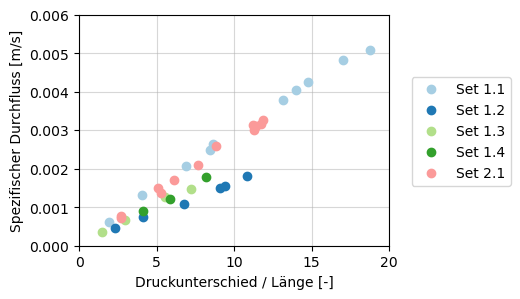

In [3]:
# load data into workspace
df = pd.read_csv("results/Darcys_Experiment_1.csv", sep=',')
df["Flow"] = df["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
df2 = pd.read_csv("results/Darcys_Experiment_2.csv", sep=',')
df2["Flow"] = df2["Flow"]/(np.pi*(.35/2)**2*60*1000) # convert to m/s
df.head()
#df2.head()

# plot data
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(df.loc[df["Set"]==1,"Pressure"]/0.58, df.loc[df["Set"]==1,"Flow"], 'o', c='#a6cee3', label='Set 1.1')
ax.plot(df.loc[df["Set"]==2,"Pressure"]/1.14, df.loc[df["Set"]==2,"Flow"], 'o', c='#1f78b4', label='Set 1.2')
ax.plot(df.loc[df["Set"]==3,"Pressure"]/1.71, df.loc[df["Set"]==3,"Flow"], 'o', c='#b2df8a', label='Set 1.3')
ax.plot(df.loc[df["Set"]==4,"Pressure"]/1.70, df.loc[df["Set"]==4,"Flow"], 'o', c='#33a02c', label='Set 1.4') 
ax.plot(df2.loc[df2["Set"]==1,"Pressure difference"]/1.1, df2.loc[df2["Set"]==1,"Flow"], 'o', c='#fb9a99', label='Set 2.1')
ax.set_xlim([0, 20])
ax.set_ylim([0, 0.006])
plt.xlabel('Druckunterschied / Länge [-]')
plt.ylabel('Spezifischer Durchfluss [m/s]')
plt.legend(bbox_to_anchor=(1.05, 0.76))
plt.grid(alpha=0.5)
%matplotlib inline

## Analyse der Ergebnisse

Der Zusammenhang in der obigen Abbildung scheint linear zu sein, d.h. der Durchfluss kann als eine lineare Funktion des normalisierten Druckunterschieds beschrieben werden.

$$ Q = K  {\Delta P \over L} $$

wobei $K$ nun eine lineare Konstante ist, die den Zusammenhang quantitativ beschreibt. 
Man kann $K$ berechnen, indem man eine lineare Funktion an die Daten anpasst (mittels linearer Regression).

<span style="color:Indigo">**Frage**: *Wie verändert sich die Beziehung für größere Werte von $K$ und wovon hängt $K$ ab?*</span>


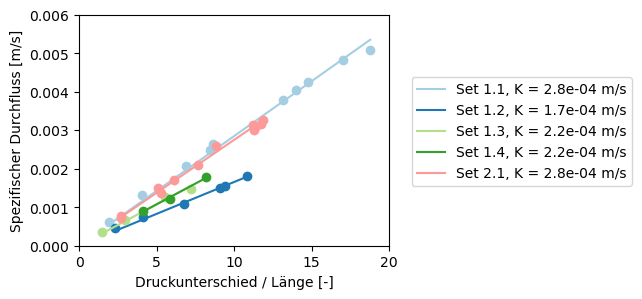

In [4]:
# fit data
def plot_linear_regression(X,Y,color,text):
    model = LinearRegression(fit_intercept=False)
    model.fit(X, Y)
    predictions = model.predict(X)
    slope = model.coef_[0]
    ax.plot(X, Y, 'o', c=color)
    ax.plot(X, predictions, '-', c=color, label=text+f', K = {slope:.1e} m/s') #.2f

# plot data
fig, ax = plt.subplots(figsize=(4, 3))
plot_linear_regression(df.loc[df["Set"]==1,"Pressure"].values.reshape(-1, 1)/0.58, df.loc[df["Set"]==1,"Flow"],'#a6cee3','Set 1.1')
plot_linear_regression(df.loc[df["Set"]==2,"Pressure"].values.reshape(-1, 1)/1.14, df.loc[df["Set"]==2,"Flow"],'#1f78b4','Set 1.2')
plot_linear_regression(df.loc[df["Set"]==3,"Pressure"].values.reshape(-1, 1)/1.71, df.loc[df["Set"]==3,"Flow"],'#b2df8a','Set 1.3')
plot_linear_regression(df.loc[df["Set"]==4,"Pressure"].values.reshape(-1, 1)/1.70, df.loc[df["Set"]==4,"Flow"],'#33a02c','Set 1.4')
plot_linear_regression(df2.loc[df2["Set"]==1,"Pressure difference"].values.reshape(-1, 1)/1.1, df2.loc[df2["Set"]==1,"Flow"],'#fb9a99','Set 2.1')
ax.set_xlim([0, 20])
ax.set_ylim([0, 0.006])
plt.xlabel('Druckunterschied / Länge [-]')
plt.ylabel('Spezifischer Durchfluss [m/s]')
#plt.grid(alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 0.76))
%matplotlib inline

## Der Parameter $K$

Der Parameter $K$ ist eine Eigenschaft des Materials in der Säule und wird heutzutage als hydraulische Leitfähigkeit (manchmal auch Durchlässigkeit) bezeichnet.
Sie hängt von Eigenschaften des Materials ab, vor allem von der Korngröße, aber auch von der Verdichtung und der räumlichen Anordnung der Gesteinspartikel.
Die hydraulische Leitfähigkeit ist eine zentrale Größe, die das Strömen von Wasser durch poröse Materialien beschreibt, so auch von Wasser durch Sediment- und Gesteinsschichten.
Die hydraulische Leitfähigkeit hat die Einheit m/s (ist aber keine Geschwindigkeit im eigentlichen Sinn).

Es ist interessant, sich nun auch Darcys Interpretation anzuschauen.
Darcy (1856) schrieb, übersetzt aus dem Französischen: "Die Unterschiede zwischen den Koeffizientenwerten rühren daher, dass der verwendete Sand nicht durchgehend homogen war. Bei der zweiten Serie war er nicht gewaschen, bei der dritten Serie war er gewaschen und bei der vierten Serie war er sehr gut gewaschen und etwas stärker gekörnt."

Die folgenden Leitfähigkeiten wurden von Darcy berechnet. Der letzte Wert ist, wie von Freeze (1994) und Brown (2002) bemerkt, entweder falsch berechnet oder die angegebene Säulenlänge stimmt nicht.

| Set | Gleichung | $K$ [m/s] |
| -------- | -------- | ------- |
| 1.1 | $Q$ = 0.286 $I$ | 2.9e-4 |
| 1.2 | $Q$ = 0.165 $I$ | 1.7e-4 |
| 1.3 | $Q$ = 0.216 $I$ | 2.2e-4 |
| 1.4 | $Q$ = 0.332 $I$ | 3.3e-4 |

Es gibt einige unklare Stellen in Darcys Bericht, beispielsweise ist die Bennenung der Variablen nicht immer konsistent. Insgesamt beschreibt er aber eindrucksvoll die Entdeckung eines Zusammenhangs, der später vielfach experimentell bestätigt und theoretisch hergeleitet wurde. Darcys Gesetz gehört heutzutage zu den Grundlagen der Hydrogeologie sowie anderer Wissenschaften, die sich mit dem Fließen von Fluiden durch poröse Materialien beschäftigen.

## Übertragung auf Grundwassersysteme

Der normalisierte Druckunterschied in echten Grundwassersystemen ist definiert durch den Unterschied der Standrohrspiegelhöhe $\Delta h$ über eine gewisse Distanz $L$ (z.B. zwischen zwei Brunnen) und wird als hydraulischer Gradient bezeichnet. Man kann Darcys Gesetz dementsprecht wie folgt umformulieren:

$$ q = - K {\Delta h \over L} $$


Darcys Gesetz beschreibt also den Durchfluss als Funktion der des hydraulischen Gradienten und der hydraulischen Leitfähigkeit. 
Um den volumetrischen Durchfluss $Q$ in m³/s zu erhalten, müsste man nun den spezifischen Durchfluss noch mit dem Aquiferquerschnitt multiplizieren. Meistens betrachtet man allerdings den spezifischen Durchfluss (häufig kurz Durchfluss), da dieser verschieden große Systeme vergleichbar macht.

Die Regler unten erlauben es nun Darcys Gesetz anzuwenden. Links kann die hydraulische Leitfähigkeit variiert werden, rechts der hydraulische Gradient.

<span style="color:Indigo">**Frage**: *Was passiert mit dem Durchfluss, wenn die hydraulische Leitfähigkeit erhöht wird? Und was, wenn der hydraulische Gradient erhöht wird? Kann man die Leitfähigkeit bestimmen, wenn man nur den Durchfluss kennt?*</span>


In [5]:
def f(K):
    
    K_default = 1e-4
    X = np.arange(0,0.2,0.01)
    Y_default = K_default*X
    Y = K*X
    fig, ax = plt.subplots(figsize=(4, 3))
    ax.plot(X, Y, '-', c='tab:blue', label=f'K = {K:.1e} m/s')
    ax.set_xlim([0, 0.1])
    ax.set_ylim([0, 0.001])
    #plt.xscale('log')
    plt.xlabel('Hydraulischer Gradient [-]')
    plt.ylabel('Spezifischer Durchfluss [m/s]')
    plt.grid(alpha=0.5)
    plt.legend(loc='upper left')

#widgets.interact(f, K=np.logspace(-6,-3, 4))
widgets.interact(f, K=(0.0001,0.01,0.0001))

%matplotlib inline

interactive(children=(FloatSlider(value=0.005, description='K', max=0.01, min=0.0001, step=0.0001), Output()),…

## Zusammenfassung und Ausblick
Die Übung hat gezeigt, dass sowohl die hydraulische Leitfähigkeit als auch der hydraulischer Gradient essentiell sind um Grundwassersysteme zu verstehen. 
Deswegen messen wir diese beiden Variablen auch häufig. Wie genau und welche Herausforderungen es hierbei gibt, werden wir im weiteren Verlauf der Vorlesung erörtern.

Darcys Gesetz ist eine lineare Gleichung und daher recht einfach zu verstehen. 
Die Gleichung werden wir später mit anderen Gleichungen kombinieren um die Grundwasserströmungsgleichung zu erhalten. 
Das ist mathematisch zwar etwas komplizierter, aber grundsätzlich gilt auch dann immer noch: eine höhere hydraulische Leitfähigkeit und ein höherer hydraulischer Gradient führen zu einem höheren Durchfluss.

